In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [239]:
data_downsampled = np.genfromtxt('data_clinton_downsampled.csv', delimiter=',')

In [240]:
data_downsampled.shape

(513, 3)

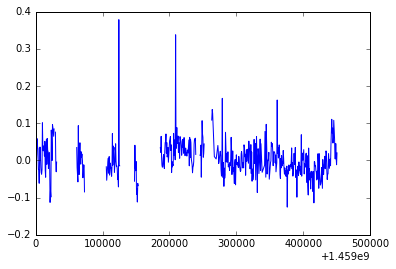

In [241]:
plt.plot(data_downsampled[:,0], data_downsampled[:,1])

In [242]:
data = np.genfromtxt('data_clinton_00000.csv', delimiter=',')

# Mode

In [243]:
from scipy.stats import mode

In [244]:
modes = []
mood = []
tweets = 0
min_tweets = 100
prev_time = data[0,0]
R = 10*60

for row in data:
    tweets += 1
    if not row[1] == 0:
        mood.append(float(row[1]))
    time_diff = float(row[0]) - prev_time
    if time_diff > R:
        if int(time_diff / R) > 1:
            modes.append([row[0]-(time_diff*0.5), None, None, None])
        elif time_diff > R and tweets > min_tweets:
            m = mode(mood)
            modes.append([row[0]-(R*0.5), m[0][0], m[1][0], m[1][0]/len(mood)])
        mood = []
        prev_time = float(row[0])
        tweets = 0

In [245]:
np.array(modes).shape

(512, 4)

In [246]:
modes = np.array(modes)

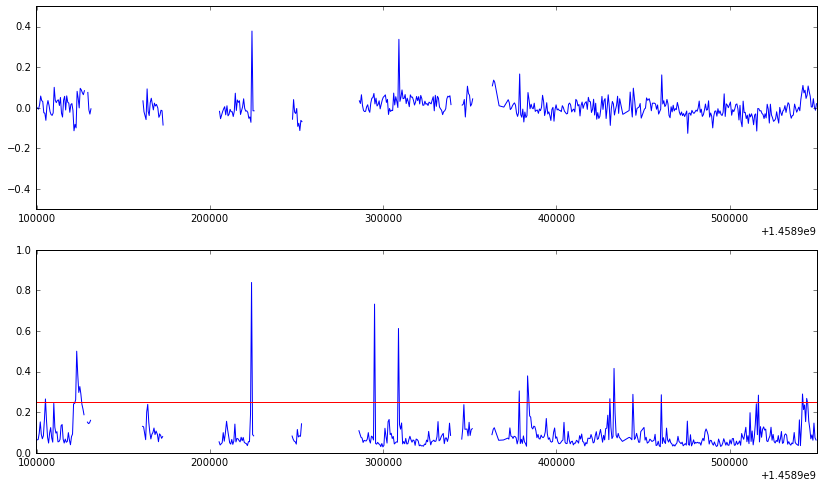

In [250]:
# threshold = np.nanstd(modes[:,3]) * 3
threshold = 0.25

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(data_downsampled[:,0], data_downsampled[:,1])
plt.ylim([-0.5, 0.5])
plt.xlim([data[0,0], data[-1,0]])
plt.subplot(212)
plt.plot(modes[:,0], modes[:,3])
plt.ylim([0,1])
plt.xlim([data[0,0], data[-1,0]])
plt.axhline(y=threshold, c='r')